In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

In [2]:
#Importing the dataset

In [3]:
df=pd.read_csv('./Data/train_set.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP'],
      dtype='object')

In [5]:
#database with 8995 datapoints

In [6]:
df.shape

(8995, 11)

In [7]:
#The variables that have on average 1300 null values.
#The average age of the Digital House students is 34 years
#The average performance in digital house is 3.5
#The average minutes dedicated to the course is 4419
#The average years of experience of digital house is 16.11
#The average days to find a job is 90

In [8]:
df.describe()

,Unnamed: 0,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
count,8995.000000,7668.000000,7651.000000,7619.000000,7618.000000,8995.000000
mean,5499.806115,33.989176,3.503228,4419.936461,16.112497,90.807449
std,2598.235516,5.024501,0.404276,524.528119,7.154829,5.675932
min,1000.000000,15.000000,2.100000,889.300000,0.000000,79.000000
25%,3249.500000,31.000000,3.200000,4345.850000,10.825000,86.000000
50%,5500.000000,34.000000,3.500000,4575.300000,16.200000,90.000000
75%,7749.500000,37.000000,3.800000,4676.100000,21.600000,95.000000
max,9999.000000,52.000000,4.900000,7466.500000,31.900000,115.000000


In [9]:
df.isnull().sum()

Unnamed: 0         0
EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA     1377
DIAS_EMP           0
dtype: int64

In [10]:
#We will now find outliers and imbalances in the dataset

In [11]:
#Not many outliers in the DIAS_EMP target variable, but all of them in the upper side of the distribution.
#The minimum days spent to find a job is 79

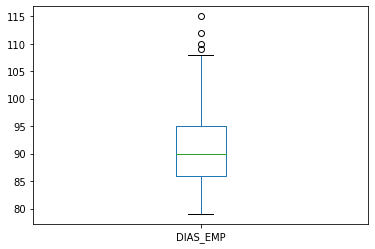

In [12]:
box_days=df['DIAS_EMP'].plot(kind='box')

In [13]:
fig=box_days.get_figure()
fig.savefig('./graphs/box_days.png')

In [14]:
#In age, there are outliers in both the upper and lower sides of the distribution.
#There is a person with 15 years, who took 84 days in finding a job. The days to find a job are not an outlier
#so we are going to keep that data point for training.

In [15]:
df[df.EDAD==15]

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
5481,6484,15.0,MASCULINO,ARGENTINA,TERTIARY,ENGINEERING,DATA,3.4,4547.4,1.3,84.0


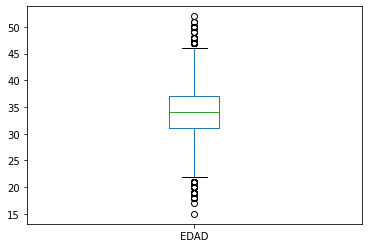

In [16]:
box_age=df['EDAD'].plot(kind='box')

In [17]:
fig=box_age.get_figure()
fig.savefig('./graphs/box_age.png')

In [18]:
#In AVG_DH también hay outliers en ambos lados de la distribución

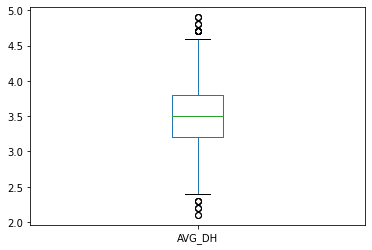

In [19]:
box_avg=df['AVG_DH'].plot(kind='box')

In [20]:
fig=box_avg.get_figure()
fig.savefig('./graphs/box_avg.png')

In [21]:
#The minutes DH variables has a lot of variance, great concentration around the mean but huge variability in both tales

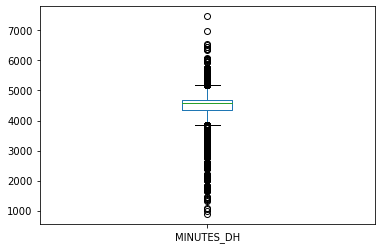

In [22]:
box_minutes=df['MINUTES_DH'].plot(kind='box')

In [23]:
fig=box_minutes.get_figure()
fig.savefig('./graphs/box_minutes.png')

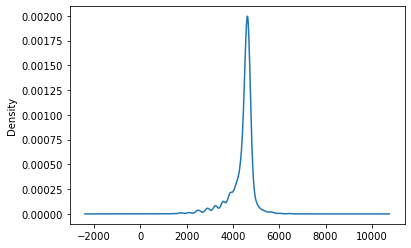

In [24]:
dist_minutes=df['MINUTES_DH'].plot(kind='density')

In [25]:
fig=dist_minutes.get_figure()
fig.savefig('./graphs/dist_minutes.png')

In [26]:
#No hay outliers en Experiencia

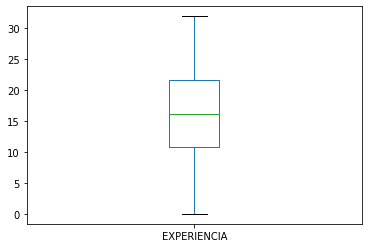

In [27]:
box_exp=df['EXPERIENCIA'].plot(kind='box')

In [28]:
fig=box_exp.get_figure()
fig.savefig('./graphs/box_exp.png')

In [29]:
#Genero

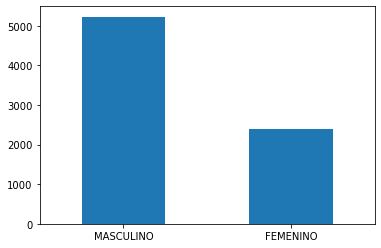

In [30]:
bar_gender=df['GENERO'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
fig=bar_gender.get_figure()
fig.savefig('./graphs/bar_gender.png')

In [31]:
#Residencia

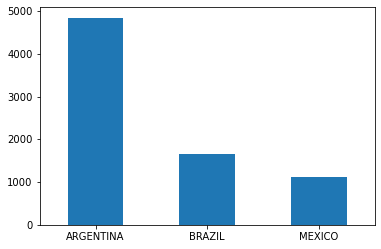

In [32]:
bar_residence=df['RESIDENCIA'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
fig=bar_residence.get_figure()
fig.savefig('./graphs/bar_residence.png')

In [33]:
#NV ESTUDIO

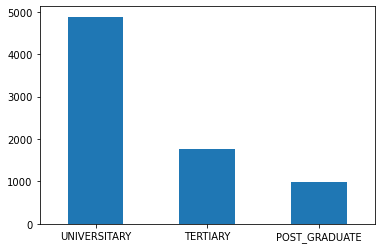

In [34]:
bar_studies=df['NV_ESTUDIO'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
fig=bar_studies.get_figure()
fig.savefig('./graphs/bar_studies.png')

In [35]:
#Estudio Prev

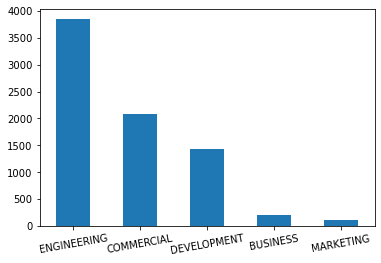

In [36]:
bar_prev=df['ESTUDIO_PREV'].value_counts().plot(kind='bar')
plt.xticks(rotation=10)
fig=bar_prev.get_figure()
fig.savefig('./graphs/bar_prev.png')

In [37]:
#Course

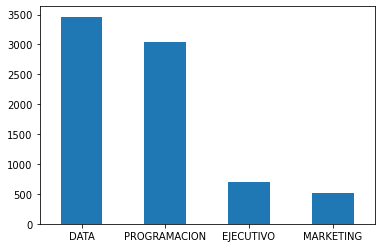

In [38]:
bar_course=df['TRACK_DH'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
fig=bar_course.get_figure()
fig.savefig('./graphs/bar_course.png')

In [39]:
# Double check for outliers, counting them with the IQR

In [40]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#df[df<(q1-1.5*iqr)|df>(q3+1.5*iqr)]

In [41]:
iqr['EDAD']

6.0

In [42]:
((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).sum()

AVG_DH           25
DIAS_EMP          4
EDAD             94
ESTUDIO_PREV      0
EXPERIENCIA       0
GENERO            0
MINUTES_DH      966
NV_ESTUDIO        0
RESIDENCIA        0
TRACK_DH          0
Unnamed: 0        0
dtype: int64

In [43]:
(df<(q1-1.5*iqr))['EDAD']

0       False
1       False
2       False
3       False
4       False
        ...  
8990    False
8991    False
8992    False
8993    False
8994    False
Name: EDAD, Length: 8995, dtype: bool

In [44]:
(df>(q3+1.5*iqr)).sum()

AVG_DH           16
DIAS_EMP          4
EDAD             47
ESTUDIO_PREV      0
EXPERIENCIA       0
GENERO            0
MINUTES_DH      146
NV_ESTUDIO        0
RESIDENCIA        0
TRACK_DH          0
Unnamed: 0        0
dtype: int64

In [45]:
#Correlations
#AVG_DH and MINUTES_DH are the ones that exhibit less correlation with DIAS_EMP

In [46]:
correlations=df[['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP']].corr()

In [47]:
correlations

,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
EDAD,1.000000,0.007860,-0.008441,0.986745,0.414583
AVG_DH,0.007860,1.000000,0.863842,0.016897,-0.065931
MINUTES_DH,-0.008441,0.863842,1.000000,0.004918,-0.079498
EXPERIENCIA,0.986745,0.016897,0.004918,1.000000,0.416221
DIAS_EMP,0.414583,-0.065931,-0.079498,0.416221,1.000000


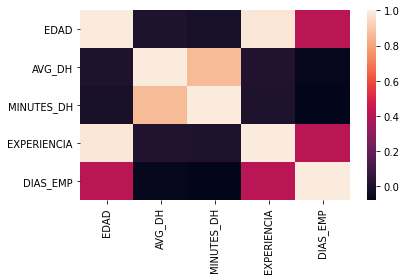

In [48]:
correlations_heatmap=sns.heatmap(correlations)
fig=correlations_heatmap.get_figure()
plt.tight_layout()
fig.savefig('./graphs/correlations_hmap.png')

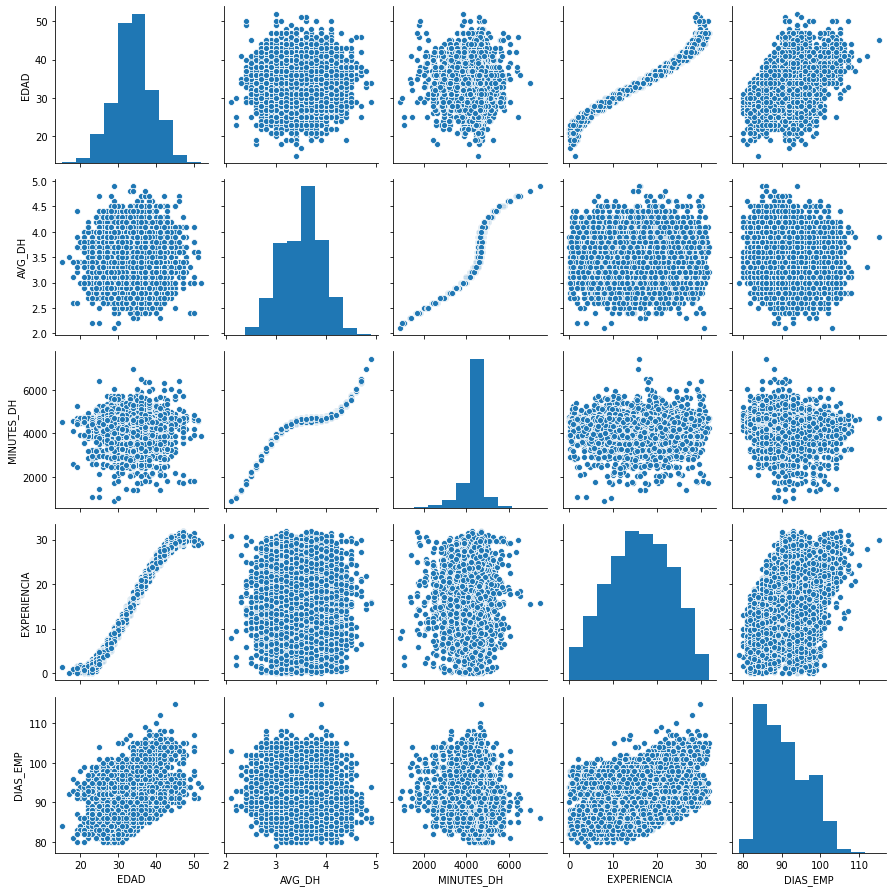

In [49]:
pairplot=sns.pairplot(df[['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP']])
#fig=pairplot.get_figure()
plt.tight_layout()
pairplot.savefig('./graphs/pairplot.png')

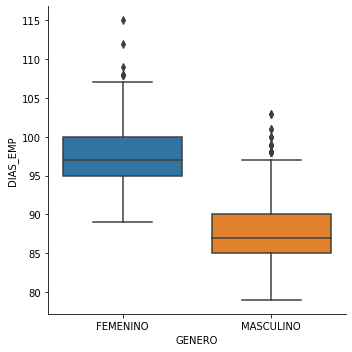

In [50]:
men_women=sns.catplot(x='GENERO',y='DIAS_EMP',kind='box',data=df)
plt.tight_layout()
men_women.savefig('./graphs/men_women.png')

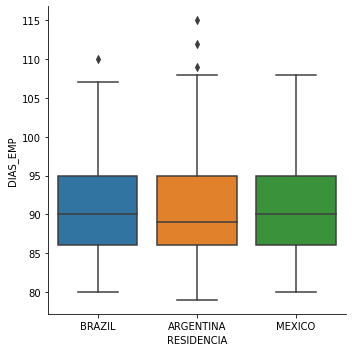

In [51]:
sns.catplot(x='RESIDENCIA',y='DIAS_EMP',kind='box',data=df)

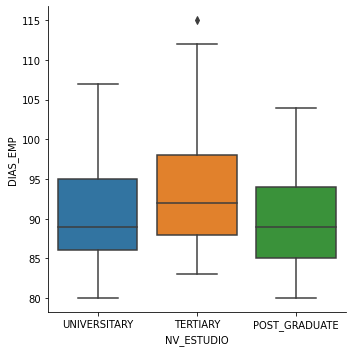

In [52]:
sns.catplot(x='NV_ESTUDIO',y='DIAS_EMP',kind='box',data=df)

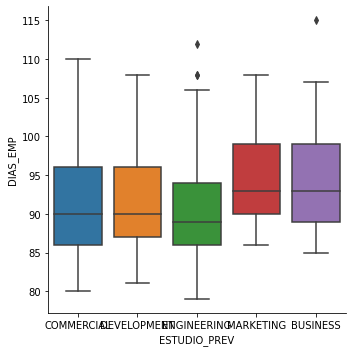

In [53]:
sns.catplot(x='ESTUDIO_PREV',y='DIAS_EMP',kind='box',data=df)

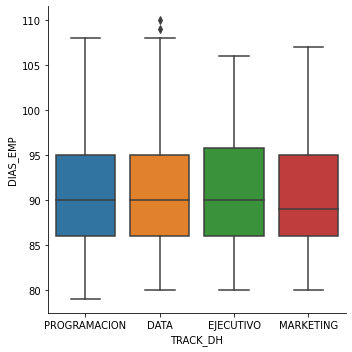

In [54]:
sns.catplot(x='TRACK_DH',y='DIAS_EMP',kind='box',data=df)

## XGBoost

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from transformations_pipeline import DropColumns
from transformations_pipeline import Imputer
from transformations_pipeline import Encoder
from transformations_pipeline import Scaler
from transformations_pipeline import ManageOutliers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from itertools import combinations
%matplotlib inline
df=pd.read_csv('./Data/train_set.csv')

In [56]:
df.columns

Index(['Unnamed: 0', 'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP'],
      dtype='object')

In [57]:
features=list(df.columns)
features.remove('DIAS_EMP')
target=['DIAS_EMP']
X=df[features]
y=df[target]

In [58]:
drop_cols=DropColumns(['Unnamed: 0'])
encode=Encoder(['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])
impute=Imputer(['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA'])
scale=Scaler(['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA'])
outliers=ManageOutliers(['EDAD','AVG_DH','MINUTES_DH'])
drop_cols2=DropColumns(['RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL','RESIDENCIA_MEXICO','TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION','MINUTES_DH','EXPERIENCIA'])

In [59]:
df_pipeline = Pipeline(
    steps=[
        ('remove_columns', drop_cols),
        ('encode', encode),
        ('impute', impute),
        ('remove_columns2', drop_cols2),
        
    ]
)
X=df_pipeline.fit_transform(X)

In [60]:
xgbreg = xgb.XGBRegressor(booster='gbtree',learning_rate=0.14,n_estimators=90,max_depth=7,alpha=0.9,n_jobs=-1)
cv=cross_validate(xgbreg,X,y,cv=5,scoring='r2')
print([cv['test_score'].mean()])

[0.8099004325400647]
